# Test Case Generation Notebook

This notebook is dedicated to generating test cases. We used Python libraries such as NumPy and the `random` module.

## Initial Setup


In [1]:
import numpy as np
import random

## Matrix Generation and Sorting Functions

In this section, we define a series of functions to generate and handle matrices:

1. `generate_random_matrix(M, N, max_value=100)`: Generates a random matrix of size MxN with elements ranging from -max_value to max_value.

2. `generate_matrix_with_zeros(M, N, max_value=100)`: Similar to `generate_random_matrix`, but also randomly inserts a certain number of zeros into the matrix.

3. `mass_generate_and_sort_matrices(num_matrices, max_size, max_value=100)`: This function generates a specified number of matrices using the above two functions. The matrices are then sorted by their size (M * N).

### Execution
After defining these functions, we generate 100 matrices with maximum dimensions of max(2, 20)x max(20, 22), sort them by size, and then display their dimensions and contents.

In [2]:
def generate_random_matrix(M, N, max_value=100):
    return np.random.randint(-max_value, max_value + 1, size=(M, N))

def generate_matrix_with_zeros(M, N, max_value=100):
    matrix = np.random.randint(-max_value, max_value + 1, size=(M, N))
    zero_count = random.randint(1, M * N // 2)  # Random number of zeros
    matrix.flat[random.sample(range(M * N), zero_count)] = 0
    return matrix

def mass_generate_and_sort_matrices(num_matrices, max_size, max_value=100):
    matrices = []
    types = [
        lambda M, N: generate_random_matrix(M, N, max_value),
        lambda M, N: generate_matrix_with_zeros(M, N, max_value)
    ]
    for i in range(num_matrices):
        M_size = random.randint(2, max_size+2)
        N_size = random.randint(2, max_size+2)
        matrix_type = types[i % len(types)]  # Rotate through the matrix types
        matrix = matrix_type(M_size, N_size)
        matrices.append(matrix)

    # Sorting matrices by their size (M * N)
    sorted_matrices = sorted(matrices, key=lambda x: x.shape[0] * x.shape[1])
    return sorted_matrices

# Takes in number of matrices and maximum possible (M, N)
sorted_matrices = mass_generate_and_sort_matrices(100, 20)
for matrix in sorted_matrices:
    print(matrix.shape, matrix, "\n")

(3, 3) [[ 49 -14 -85]
 [-37 -76  72]
 [-52  13  -3]] 

(2, 7) [[  0 -67   0 -57  88  28  30]
 [  9 -50  62  27 -49 -83 -28]] 

(6, 3) [[-68 -86 -35]
 [ 80  -9 -50]
 [ 69  61  19]
 [-83 -18  18]
 [-64  85  94]
 [-95 -49   7]] 

(5, 4) [[ 27 -65  60 -42]
 [  0  79  40 -24]
 [ 33  64  41   5]
 [ 88 -74  26  95]
 [-70  73 -41  85]] 

(3, 7) [[ 93  47  89 -56 -30 -60 -22]
 [ 70  82 -95 -17  92   2  49]
 [-94 -61  33 -12  -1   1  44]] 

(11, 2) [[ 69   6]
 [-68  60]
 [ 61 -93]
 [ 97  90]
 [-87  -1]
 [ 40  98]
 [ 64 -55]
 [ 27 -51]
 [100  30]
 [ 17 -71]
 [ 68 -28]] 

(2, 11) [[ 22 -61  28   0 -16 -24 -43  97   5 -12 -25]
 [-14  91 -68 -55 -99   0  29  46 -79  13 -81]] 

(4, 7) [[ 61 -35 -67  10 -65 -52 -59]
 [ 78 -50 -11 -48 -64  46 -58]
 [-55 -80  14  74  39  81 -69]
 [-33 -69  29 -31   7 -51  12]] 

(4, 7) [[-92  16 -52  44 -80 -15 -65]
 [ -7 -60  -3  13  66  -6 -42]
 [-79   7   5  58 -24 -73 -78]
 [ 98 -56 -48 -94 -90 -84  56]] 

(8, 4) [[-20  88 -38  14]
 [-91 -57 -32 -44]
 [ 13 -83 -87  

## Visualization of Matrix Size Distribution

In this section, we visualize the distribution of matrix sizes generated in the previous step. To achieve this, we:

1. Import `matplotlib.pyplot` for plotting capabilities.

2. Define the function `plot_matrix_distribution(matrices)`:
   - This function takes the list of matrices as input.
   - It extracts the dimensions (number of rows and columns) of each matrix.
   - These dimensions are then plotted as a scatter plot to visualize the distribution of matrix sizes.

3. Execute `plot_matrix_distribution(sorted_matrices)` to display the plot.

### Plot Description
The scatter plot will have the number of rows on the x-axis and the number of columns on the y-axis. Each point represents a matrix, providing a visual representation of the variety in sizes of the matrices we have generated and sorted.


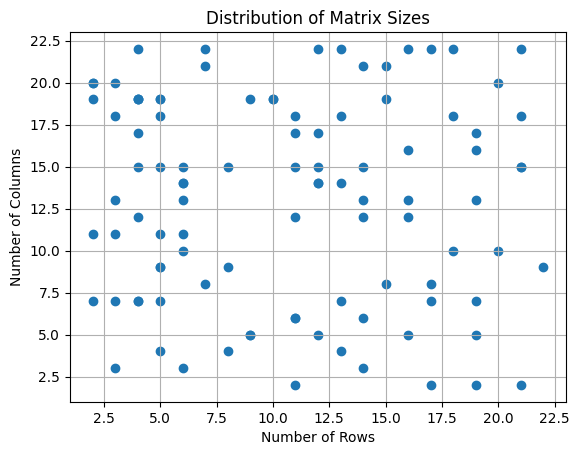

In [3]:
import matplotlib.pyplot as plt

def plot_matrix_distribution(matrices):
    sizes = [(m.shape[0], m.shape[1]) for m in matrices]

    rows = [size[0] for size in sizes]
    columns = [size[1] for size in sizes]

    plt.scatter(rows, columns)
    plt.xlabel('Number of Rows')
    plt.ylabel('Number of Columns')
    plt.title('Distribution of Matrix Sizes')
    plt.grid(True)
    plt.show()


plot_matrix_distribution(sorted_matrices)

 The plot shows a wide variety of matrix sizes, with no immediate pattern indicating a concentration or clustering of sizes.

## Percentile Calculation for Matrix Sizes

This section focuses on calculating key percentiles for the sizes of the matrices generated previously. To do this, we:

1. Import the `stats` module from `scipy`.

2. Define the function `calculate_percentiles(matrices)`:
   - This function computes the 25th, 50th (median), and 75th percentiles for the sizes of the matrices. The size of each matrix is considered as the product of its dimensions (M * N).
   - The sizes of all matrices are flattened into a one-dimensional array for percentile calculation.
   - It then prints the value of each percentile to provide insights into the distribution of matrix sizes.

3. `calculate_percentiles(sorted_matrices)` displays the calculated percentiles.



In [4]:
from scipy import stats

def calculate_percentiles(matrices):
    # Flatten matrix sizes (M * N) into a 1D array
    sizes = np.array([m.shape[0] * m.shape[1] for m in matrices])
    percentiles = [25, 50, 75]
    for percentile in percentiles:
        value = np.percentile(sizes, percentile)
        print(f"{percentile}th Percentile: {value}")

calculate_percentiles(sorted_matrices)

25th Percentile: 51.0
50th Percentile: 90.5
75th Percentile: 193.5


### Insight from Percentiles
* The percentiles give us an understanding of the distribution of matrix sizes. For instance, the 50th percentile (median) indicates the middle value in the distribution of number of elements in the matrices, helping us understand the typical size of the matrices in our dataset. Results may vary for each run of the notebook.
* For example, for this run of the notebook: the 25th percentile of 66.0 means 25% of the matrices are smaller or equal in size. The 50th percentile, or median, at 131.0 indicates that half of the matrices are smaller or equal to this size. The 75th percentile of 252.0 shows that 75% of matrices are smaller or equal, highlighting larger sizes in the top 25% of the data set

### Brute Force Constrained and Non-contrained

In [5]:
def maxMatrixSum_non_constraint(matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    # Calculate cumulative sums
    cumulative_sums = [[0] * (cols + 1) for _ in range(rows + 1)]
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            cumulative_sums[i][j] = (
                matrix[i - 1][j - 1]
                + cumulative_sums[i - 1][j]
                + cumulative_sums[i][j - 1]
                - cumulative_sums[i - 1][j - 1]
            )

    max_sum = float('-inf')
    top, left, bottom, right = 0, 0, 0, 0

    # Calculate submatrix sums using cumulative sums
    for i1 in range(1, rows + 1):
        for j1 in range(1, cols + 1):
            for i2 in range(i1, rows + 1):
                for j2 in range(j1, cols + 1):
                    submatrix_sum = (
                        cumulative_sums[i2][j2]
                        - cumulative_sums[i1 - 1][j2]
                        - cumulative_sums[i2][j1 - 1]
                        + cumulative_sums[i1 - 1][j1 - 1]
                    )

                    if submatrix_sum > max_sum:
                        max_sum = submatrix_sum
                        top = i1 - 1
                        left = j1 - 1
                        bottom = i2 - 1
                        right = j2 - 1
                        top_left = (top, left)
                        bottom_right = (bottom, right)
    return max_sum,top_left,bottom_right


def maxMatrixSum_constraint(matrix, K, L):
    rows = len(matrix)
    cols = len(matrix[0])

    # Calculate cumulative sums
    cumulative_sums = [[0] * (cols + 1) for _ in range(rows + 1)]
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            cumulative_sums[i][j] = (
                matrix[i - 1][j - 1]
                + cumulative_sums[i - 1][j]
                + cumulative_sums[i][j - 1]
                - cumulative_sums[i - 1][j - 1]
            )

    max_sum = float('-inf')
    top, left, bottom, right = 0, 0, 0, 0

    # Calculate submatrix sums using cumulative sums
    for i in range(K, rows + 1):
        for j in range(L, cols + 1):
            submatrix_sum = (
                cumulative_sums[i][j]
                - cumulative_sums[i - K][j]
                - cumulative_sums[i][j - L]
                + cumulative_sums[i - K][j - L]
            )

            if submatrix_sum > max_sum:
                max_sum = submatrix_sum
                top = i - K
                bottom = i - 1
                left = j - L
                right = j - 1
    return max_sum,(top,left),(bottom,right)

## Generation of Non-Constrained Solutions Dictionary

This section introduces the `generate_noncon_Dict` function, which processes a list of matrices to find specific characteristics and store them in a structured format. Key actions of this function include:

- Iterating through each matrix in `Lmat`.
- For each matrix, calculating its maximum sum in a non-constrained subarray and its respective top-left and bottom-right indices (assumed to be done by `maxMatrixSum_non_constraint` function).
- Storing the matrix, the calculated maximum sum, and subarray indices in a dictionary.
- Appending each dictionary to a list, which is then returned.

After defining the function, we execute it with `sorted_matrices` to obtain `Non_Constrained_Sols`, a collection of dictionaries with details about each matrix and its non-constrained solution.

In [6]:
def generate_noncon_Dict(Lmat):
  ls = []
  for m in Lmat:
    dict = {}
    max_sum, top_left, bottom_right = maxMatrixSum_non_constraint(m)
    dict['matrix'] = m.tolist()
    dict["expected_result"] = max_sum
    dict["subarray_indices"] = [top_left, bottom_right]

    ls.append(dict)
  return ls

Non_Constrained_Sols = generate_noncon_Dict(sorted_matrices)

In [7]:
Non_Constrained_Sols[1:5]

[{'matrix': [[0, -67, 0, -57, 88, 28, 30], [9, -50, 62, 27, -49, -83, -28]],
  'expected_result': 146,
  'subarray_indices': [(0, 4), (0, 6)]},
 {'matrix': [[-68, -86, -35],
   [80, -9, -50],
   [69, 61, 19],
   [-83, -18, 18],
   [-64, 85, 94],
   [-95, -49, 7]],
  'expected_result': 259,
  'subarray_indices': [(2, 1), (4, 2)]},
 {'matrix': [[27, -65, 60, -42],
   [0, 79, 40, -24],
   [33, 64, 41, 5],
   [88, -74, 26, 95],
   [-70, 73, -41, 85]],
  'expected_result': 420,
  'subarray_indices': [(1, 0), (4, 3)]},
 {'matrix': [[93, 47, 89, -56, -30, -60, -22],
   [70, 82, -95, -17, 92, 2, 49],
   [-94, -61, 33, -12, -1, 1, 44]],
  'expected_result': 292,
  'subarray_indices': [(0, 0), (1, 1)]}]

## Function for Saving Variables to a Python File

The `save_variable_to_py` function saves a given variable to a Python (.py) file. The key steps performed by this function are:

- Converting the input variable to a string representation using `repr()`.
- Creating a string that represents a line of Python code, which assigns the string representation of the variable to a variable name.
- Writing this line of code to a specified file, effectively saving the variable's state.



In [8]:
def save_variable_to_py(variable, variable_name, filename):
    # Convert the variable to a string representation
    variable_str = repr(variable)

    # Create the content to be written to the file
    file_content = f"{variable_name} = {variable_str}\n"

    # Write the content to the file
    with open(filename, 'w') as file:
        file.write(file_content)

## Edge Case Tests for Non-Constrained Matrix Analysis

`Edge_cases_non_constrained_tests`: each entry is a a unique edge case for testing the non-constrained matrix analysis functionality. The key components in each dictionary are:

- `matrix`: The matrix to be tested, which can have various forms such as None, invalid inputs, non-rectangular shapes, or even 1D arrays.
- `expected_result`: A string describing the expected outcome of the test, like "No matrix", "Invalid input", "Non Rectangular matrix", or "1D matrix".
- `subarray_indices`: Set to "NIL" in these cases as the focus is on the matrix structure rather than specific subarray calculations.

### Test Cases Overview
1. **Null Matrix**: Tests the response when no matrix is provided.
2. **Matrix with Invalid Input**: Checks the handling of matrices with invalid elements (e.g., None).
3. **Non-Rectangular Matrices**: Two different scenarios test the handling of matrices that don't form perfect rectangles.
4. **1D Matrix**: Assesses how a one-dimensional matrix is handled.


In [9]:
Edge_cases_non_constrained_tests =  [{   "matrix" : None,
        "expected_result": "No matrix",
        "subarray_indices": "NIL"
    },
    {
        "matrix": [[1, 2, -1, -4, -20, None]
        ],
        "expected_result": "Invalid input",
        "subarray_indices": "NIL"
    },
     {
        "matrix": [[80, -2, -21, -4, -78],[58,98,-9]],
        "expected_result": "Non Rectange matrix",
        "subarray_indices": "NIL"
    },
    {
        "matrix": [[80],[]],
        "expected_result": "Non Rectange matrix",
        "subarray_indices": "NIL"
    },

    {
        "matrix": [1, 2, -1, -4, -20],
        "expected_result": "1D matrix",
        "subarray_indices": "NIL"
    }]

In [10]:
Non_Constrained_Testcases = Edge_cases_non_constrained_tests + Non_Constrained_Sols

In [11]:
Non_Constrained_Testcases[1:10]

[{'matrix': [[1, 2, -1, -4, -20, None]],
  'expected_result': 'Invalid input',
  'subarray_indices': 'NIL'},
 {'matrix': [[80, -2, -21, -4, -78], [58, 98, -9]],
  'expected_result': 'Non Rectange matrix',
  'subarray_indices': 'NIL'},
 {'matrix': [[80], []],
  'expected_result': 'Non Rectange matrix',
  'subarray_indices': 'NIL'},
 {'matrix': [1, 2, -1, -4, -20],
  'expected_result': '1D matrix',
  'subarray_indices': 'NIL'},
 {'matrix': [[49, -14, -85], [-37, -76, 72], [-52, 13, -3]],
  'expected_result': 72,
  'subarray_indices': [(1, 2), (1, 2)]},
 {'matrix': [[0, -67, 0, -57, 88, 28, 30], [9, -50, 62, 27, -49, -83, -28]],
  'expected_result': 146,
  'subarray_indices': [(0, 4), (0, 6)]},
 {'matrix': [[-68, -86, -35],
   [80, -9, -50],
   [69, 61, 19],
   [-83, -18, 18],
   [-64, 85, 94],
   [-95, -49, 7]],
  'expected_result': 259,
  'subarray_indices': [(2, 1), (4, 2)]},
 {'matrix': [[27, -65, 60, -42],
   [0, 79, 40, -24],
   [33, 64, 41, 5],
   [88, -74, 26, 95],
   [-70, 73, -4

In [12]:
save_variable_to_py(Non_Constrained_Testcases, 'non_constrained_tests', 'test_non_constraint.py')

## Generation of Fixed Size Constraint Solutions Dictionary

The `generate_noncon_Dict` processes matrices with fixed size constraints. The function operates as follows:

- Iterates through each matrix in the provided list `Lmat`.
- Applies a size constraint: only processes matrices larger than 4x5 (rows x columns).
- For each qualifying matrix, calculates the maximum sum in a constrained subarray (assumed to be done by `maxMatrixSum_constraint` function) with constraints of 4 rows and 5 columns.
- Stores the matrix, calculated maximum sum, subarray indices, and the constraints in a dictionary.
- Appends this dictionary to a list, which is then returned as the function's result.


In [13]:
def generate_noncon_Dict(Lmat):
  ls = []
  for m in Lmat:
    if m.shape[0] > 4 and m.shape[1] > 5:
      dict = {}
      max_sum, top_left, bottom_right = maxMatrixSum_constraint(m, 4, 5)
      dict['matrix'] = m.tolist()
      dict["expected_result"] = max_sum
      dict["subarray_indices"] = [top_left, bottom_right]
      dict["constraints"] = (4,5)
      ls.append(dict)
  return ls

Fixed_KL_Constrained_Sols = generate_noncon_Dict(sorted_matrices)

## Edge Cases for Constrained Matrix Analysis with Fixed K and L

The `Edge_cases_constrained_tests_fixed_K_L` list contains dictionaries, each representing a unique edge case for testing matrix analysis under fixed size constraints.

The key components of each dictionary include:

- `matrix`: The matrix being tested, varying from `None` to specific irregular shapes and sizes.
- `expected_result`: Describes the anticipated outcome, like "No matrix", "1D matrix", "Non Rectangular matrix", or specific error messages.
- `subarray_indices`: Set to `None` or "NIL" as these tests focus on matrix structure rather than subarray details.
- `constraints`: A tuple representing the fixed size constraints applied during the test, set to (4,5) in these cases.

### Overview of Test Cases
1. **Null Matrix Test**: Evaluates handling of a non-existent matrix.
2. **1D Matrix Test**: Assesses response to one-dimensional matrices.
3. **Non-Rectangular Matrix Tests**: Includes different scenarios of matrices that are not perfect rectangles.
4. **Constraint Error Tests**: Checks for proper handling when the constraints (4,5) exceed the matrix dimensions, expecting specific error messages.


In [14]:
Edge_cases_constrained_tests_fixed_K_L = [
    {   "matrix" : None,
        "expected_result": "No matrix",
        "subarray_indices": None,
        "constraints": (4,5)

    },
    {
        "matrix": [1, 2, -1, -4, -20],
        "expected_result": "1D matrix",
        "subarray_indices": None,
        "constraints": (4,5)
    },
     {
        "matrix": [[80, -2, -21, -4, -78],[58,98,-9]],
        "expected_result": "Non Rectange matrix",
        "subarray_indices": None,
        "constraints": (4,5)
    },

    {
        "matrix": [[80],[]],
         "expected_result": "Non Rectange matrix",
        "subarray_indices": "NIL",
        "constraints": (4,5)
    },
    {
        "matrix": [[1, 1],
                   [1, 1], [1, 1], [1, 1]],
        "expected_result": "ERROR: L IS LARGER THAN THE NUMBER OF COLUMN",
        "subarray_indices": None,
        "constraints": (4,5)
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": "ERROR: L IS LARGER THAN THE NUMBER OF COLUMN",
        "subarray_indices": None,
        "constraints": (4,5)
    }]

In [15]:
Fixed_KL_Constrained_Sols[1:5]

[{'matrix': [[-64, 36, -33, -10, 74, 10, -10, -35, -57],
   [21, 9, 23, -93, 25, -66, -14, 18, -27],
   [-51, 53, -46, 92, -95, 84, -83, -49, 64],
   [11, 21, 25, -4, -2, -25, 73, -93, -91],
   [58, -88, -91, 25, -1, -76, -5, 65, 86]],
  'expected_result': 78,
  'subarray_indices': [(0, 1), (3, 5)],
  'constraints': (4, 5)},
 {'matrix': [[0, -43, 43, -40, 87, 0, 46, 38, -20],
   [0, -7, -37, -66, 0, 3, -60, 0, 53],
   [-16, 0, -52, 29, -17, 0, -17, 78, -10],
   [64, 0, 16, 9, -62, 0, -47, 51, 0],
   [0, 0, 0, 35, -8, 62, -28, 99, -18]],
  'expected_result': 123,
  'subarray_indices': [(0, 4), (3, 8)],
  'constraints': (4, 5)},
 {'matrix': [[85, 100, -10, -29, 72, 68, -74, 49, 86, -27, -87],
   [-41, -44, 6, -20, 42, 12, 76, 78, -98, 40, 62],
   [-59, 68, 34, -90, 86, -41, 52, -82, 20, -47, -45],
   [91, 87, 72, 93, -95, -74, 28, 82, 60, -93, 81],
   [73, 7, 7, 68, 35, -21, 46, 98, 43, 68, 24]],
  'expected_result': 493,
  'subarray_indices': [(1, 6), (4, 10)],
  'constraints': (4, 5)},

In [16]:
Fixed_KL_Testcases = Edge_cases_constrained_tests_fixed_K_L + Fixed_KL_Constrained_Sols

In [17]:
save_variable_to_py(Fixed_KL_Testcases, 'constrained_tests_fixed_K_L', 'test_constraint_fixed_K_L.py')

## Generating a Random Rectangular Matrix

The `generate_rectangular_matrix` function, which is used to create a rectangular matrix with random elements. The function details are as follows:

- **Function Purpose**: To generate a matrix of specified dimensions (M rows x N columns).
- **Random Element Generation**: Each element in the matrix is randomly chosen from a range of -100 to 100.
- **Parameter Inputs**: `M` (number of rows) and `N` (number of columns).


In [18]:
def generate_rectangular_matrix(M, N):
    # Randomly generate numbers in the range [-100, 100]
    matrix = np.random.randint(-100, 101, size=(M, N))
    return matrix

# Generate a 20x20 matrix
rectangular_matrix = generate_rectangular_matrix(15, 15)
print(rectangular_matrix)

[[ -9 -68  44  45  67 -97   3  61 -16  58   0 -90 -15 -74 -66]
 [ 72  51  28  29  47  72  42  78  90 -59  10  65 -88 -21 -46]
 [-10  17  40 -96 -48 -52 -28 -84 -65  66 -62 -10  90 -59  75]
 [-82 -10  69  64  21 -30 -12 -69 -38 -54  26  25 -25  95  12]
 [-84  -6  16  22  31  77 -23  60 -60  25  14  92  78  90  -8]
 [ 82 -82 -10 -37  11  51 -65  81   4   3  55  88  78  -3  20]
 [ -5   0 -58  -4  51 -71  97 -12  61  20  40  36 -22  15  43]
 [-18  84 -19 -87  88 -84 -65  81 -34 -97 -30  -2  97 -16 -88]
 [-84 -57  37  55  49  49 -14  -5  44 -50 -74 -21  21  25 -60]
 [ 23  -3  80 -60 -75  84  57 100  48  30  93 -71 -61  63 -51]
 [-27 -12 -89  26 -95  29 -37  61  40 -31  42   3 -38 -88  94]
 [-61  21 -96 100 -14  98 -11 -55 -95 -61 -44  99  52  53  54]
 [-93  34  30 -98  25 -56  81  26  25 -86  73 -59 -81   1  71]
 [-85  68  47  86 -89  48 -44  97 -73  89  32 -58  83 -90 -24]
 [ 29  68 -51  94  11  68 -54 -65  73 -12 -49  41 -84  87 -41]]


## Submatrix Tuple Generation and Sorting

### Generating Submatrix Tuples
The function `generate_submatrix_tuples` creates tuples for all possible submatrices within given size constraints.
- **Input Parameters**: A matrix, and maximum values for `K` (rows) and `L` (columns).
- **Tuple Creation**: For each submatrix size from 1 to `max_k - 1` for rows, and 1 to `max_l - 1` for columns, it creates a tuple of the original matrix and the submatrix size `(K, L)`.
- **Return Value**: A list of tuples, each containing the original matrix and a pair representing a possible submatrix size.

### Sorting Tuples by Submatrix Size
The `sort_tuples_by_submatrix_size` function sorts these tuples based on the size of the submatrices. The key logic involves:

- **Sorting Criterion**: Tuples are sorted by the product of `K` and `L` values in each tuple, effectively sorting by the area of the submatrices.

In [19]:
def generate_submatrix_tuples(matrix, max_k, max_l):
    tuples = []
    M, N = matrix.shape

    for K in range(1, max_k):
        for L in range(1,  max_l):
            tuples.append((matrix, (K, L)))

    return tuples

def sort_tuples_by_submatrix_size(tuples):
    return sorted(tuples, key=lambda x: x[1][0] * x[1][1])


submatrix_tuples = generate_submatrix_tuples(rectangular_matrix, int(rectangular_matrix.shape[0]/2), int(rectangular_matrix.shape[1]/2))
sorted_tuples = sort_tuples_by_submatrix_size(submatrix_tuples)


sorted_tuples

[(array([[ -9, -68,  44,  45,  67, -97,   3,  61, -16,  58,   0, -90, -15,
          -74, -66],
         [ 72,  51,  28,  29,  47,  72,  42,  78,  90, -59,  10,  65, -88,
          -21, -46],
         [-10,  17,  40, -96, -48, -52, -28, -84, -65,  66, -62, -10,  90,
          -59,  75],
         [-82, -10,  69,  64,  21, -30, -12, -69, -38, -54,  26,  25, -25,
           95,  12],
         [-84,  -6,  16,  22,  31,  77, -23,  60, -60,  25,  14,  92,  78,
           90,  -8],
         [ 82, -82, -10, -37,  11,  51, -65,  81,   4,   3,  55,  88,  78,
           -3,  20],
         [ -5,   0, -58,  -4,  51, -71,  97, -12,  61,  20,  40,  36, -22,
           15,  43],
         [-18,  84, -19, -87,  88, -84, -65,  81, -34, -97, -30,  -2,  97,
          -16, -88],
         [-84, -57,  37,  55,  49,  49, -14,  -5,  44, -50, -74, -21,  21,
           25, -60],
         [ 23,  -3,  80, -60, -75,  84,  57, 100,  48,  30,  93, -71, -61,
           63, -51],
         [-27, -12, -89,  26, -95,  29, 

In [20]:
sorted_tuples[0]

(array([[ -9, -68,  44,  45,  67, -97,   3,  61, -16,  58,   0, -90, -15,
         -74, -66],
        [ 72,  51,  28,  29,  47,  72,  42,  78,  90, -59,  10,  65, -88,
         -21, -46],
        [-10,  17,  40, -96, -48, -52, -28, -84, -65,  66, -62, -10,  90,
         -59,  75],
        [-82, -10,  69,  64,  21, -30, -12, -69, -38, -54,  26,  25, -25,
          95,  12],
        [-84,  -6,  16,  22,  31,  77, -23,  60, -60,  25,  14,  92,  78,
          90,  -8],
        [ 82, -82, -10, -37,  11,  51, -65,  81,   4,   3,  55,  88,  78,
          -3,  20],
        [ -5,   0, -58,  -4,  51, -71,  97, -12,  61,  20,  40,  36, -22,
          15,  43],
        [-18,  84, -19, -87,  88, -84, -65,  81, -34, -97, -30,  -2,  97,
         -16, -88],
        [-84, -57,  37,  55,  49,  49, -14,  -5,  44, -50, -74, -21,  21,
          25, -60],
        [ 23,  -3,  80, -60, -75,  84,  57, 100,  48,  30,  93, -71, -61,
          63, -51],
        [-27, -12, -89,  26, -95,  29, -37,  61,  40, -31,  

## Generation of Variable Size Constraint Solutions Dictionary

The `generate_noncon_Dict` function is designed to process a list of matrices, each paired with variable size constraints. The function's workflow is as follows:

- **Input**: A list of tuples, where each tuple contains a matrix and a pair of constraints `(K, L)`.
- **Processing Each Tuple**: For each tuple, the function:
  - Calculates the maximum sum of a constrained subarray within the matrix based on the provided size constraints `K` and `L` (handled by `maxMatrixSum_constraint`).
  - Constructs a dictionary containing the matrix (converted to a list), the calculated maximum sum, the top-left and bottom-right indices of the subarray, and the constraints.
- **Output**: The function returns a list of these dictionaries, each representing a matrix and its associated constrained solution.

### Function Execution
This function is executed with `sorted_tuples`, which are tuples of the rectangular matrix and various submatrix size constraints. The result, `Variable_Constrained_Sols`, is a collection of dictionaries detailing each matrix's constrained solution with variable submatrix sizes.


In [21]:
def generate_noncon_Dict(Lmat):
  ls = []
  for m,c  in Lmat:

    dict = {}
    max_sum, top_left, bottom_right = maxMatrixSum_constraint(m, c[0], c[1])
    dict['matrix'] = m.tolist()
    dict["expected_result"] = max_sum
    dict["subarray_indices"] = [top_left, bottom_right]
    dict["constraints"] = c

    ls.append(dict)
  return ls

Variable_Constrained_Sols = generate_noncon_Dict(sorted_tuples)

In [22]:
len(Variable_Constrained_Sols)

36

In [23]:
Edge_Cases_constrained_tests_variable_K_L =  [
    {   "matrix" : None,
        "expected_result": "No matrix",
        "subarray_indices": None,
        "constraints": (2,3)

    },
    {
        "matrix": [1, 2, -1, -4, -20],
        "expected_result": "1D matrix",
        "subarray_indices": None,
        "constraints": (2,3)
    },
     {
        "matrix": [[80, -2, -21, -4, -78],[58,98,-9]],
        "expected_result": "Non Rectange matrix",
        "subarray_indices": None,
        "constraints": (2,3)
    },

    {
        "matrix": [[80],[]],
        "expected_result": "Non Rectange matrix",
        "subarray_indices": "NIL",
        "constraints": (2,3)
    },
    {
        "matrix": [[1, 1],
                   [1, 1], [1, 1], [1, 1]],
        "expected_result": "ERROR: L IS LARGER THAN THE NUMBER OF COLUMN",
        "subarray_indices": None,
        "constraints": (2,3)
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": "ERROR: L IS LARGER THAN THE NUMBER OF COLUMN",
        "subarray_indices": None,
        "constraints": (2,3)
    }]

In [24]:
Constrained_tests_variable_K_L = Edge_Cases_constrained_tests_variable_K_L + Variable_Constrained_Sols

In [25]:
save_variable_to_py(Constrained_tests_variable_K_L, 'constrained_tests_variable_K_L', 'test_constraint_variable_K_L.py')